In [1]:
!pip3 install -r requirements.txt

  Using cached matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached pandas-2.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Using cached fonttools-4.53.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached pillow-10.3.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (305 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [4]:
iris_data = load_iris()

In [5]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=1, stratify=iris_data.target)

In [7]:
print("Train size: ", X_train_iris.shape, y_train_iris.shape)
print("Test size: ", X_test_iris.shape, y_test_iris.shape)

Train size:  (120, 4) (120,)
Test size:  (30, 4) (30,)


In [9]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv",
    index_col="ID",
)
df.head()

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(
    df.drop(columns=["Sales"]),
    df["Sales"],
    test_size=0.2,
    random_state=1
)

In [11]:
print("Train size: ", X_train_ad.shape, y_train_ad.shape)
print("Test size: ", X_test_ad.shape, y_test_ad.shape)

Train size:  (160, 3) (160,)
Test size:  (40, 3) (40,)


In [13]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train_iris, y_train_iris)

DecisionTreeClassifier(random_state=1)

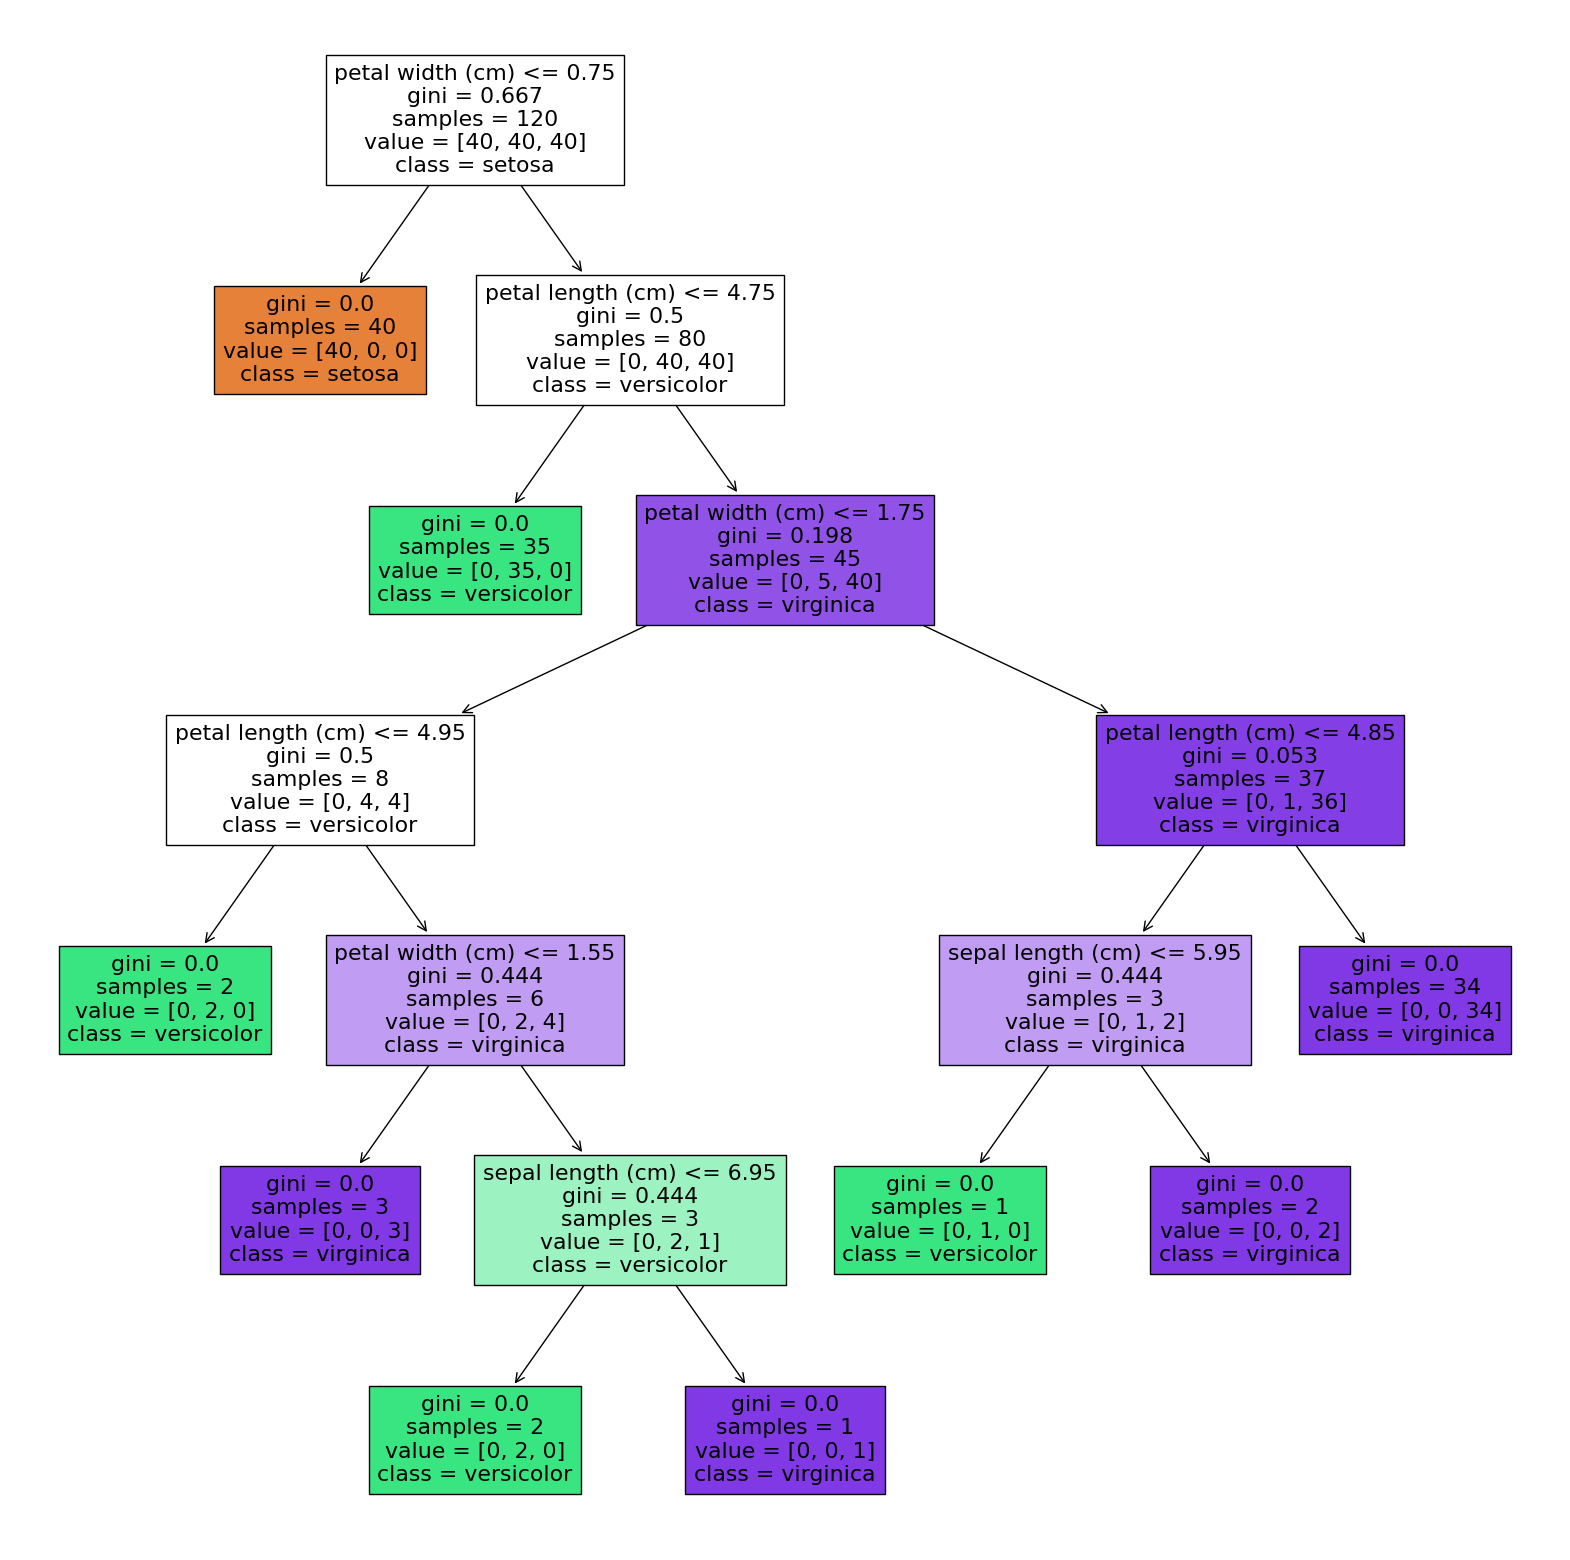

In [15]:
plt.figure(figsize=(20, 20))
plot_tree(
    dt_clf,
    filled=True,
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names,
)
plt.show()

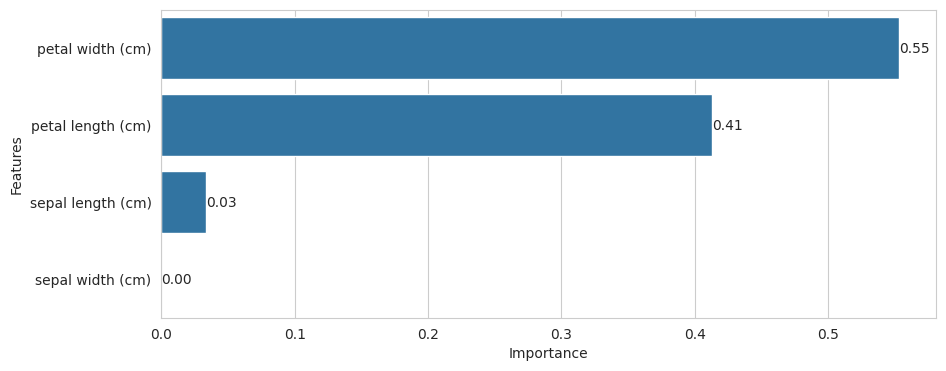

In [18]:
dt_clf_feat_importances = pd.Series(
    dt_clf.feature_importances_, index=iris_data.feature_names
).sort_values(ascending=False)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(
        x=dt_clf_feat_importances,
        y=dt_clf_feat_importances.index,
    )
    ax.bar_label(ax.containers[0], fmt="%.2f")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

In [20]:
train_preds_dt_clf = dt_clf.predict(X_train_iris)
test_preds_dt_clf = dt_clf.predict(X_test_iris)
print("Accuracy at train: ", accuracy_score(y_train_iris, train_preds_dt_clf))
print("Accuracy at test: ", accuracy_score(y_test_iris, test_preds_dt_clf))

Accuracy at train:  1.0
Accuracy at test:  0.9666666666666667


In [21]:
print("Depth: ", dt_clf.get_depth())
print("Number of leaves: ", dt_clf.get_n_leaves())

Depth:  6
Number of leaves:  9


In [22]:
dt_clf_pruned = DecisionTreeClassifier(random_state=1, max_depth=4)
dt_clf_pruned.fit(X_train_iris, y_train_iris)

DecisionTreeClassifier(max_depth=4, random_state=1)

[Text(0.25, 0.9, 'petal width (cm) <= 0.75\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.375, 0.7, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(0.5, 0.5, 'petal width (cm) <= 1.75\ngini = 0.198\nsamples = 45\nvalue = [0, 5, 40]\nclass = virginica'),
 Text(0.25, 0.3, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = versicolor'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = versicolor'),
 Text(0.375, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.75, 0.3, 'petal length (cm) <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica'),
 Text(0.625, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.8

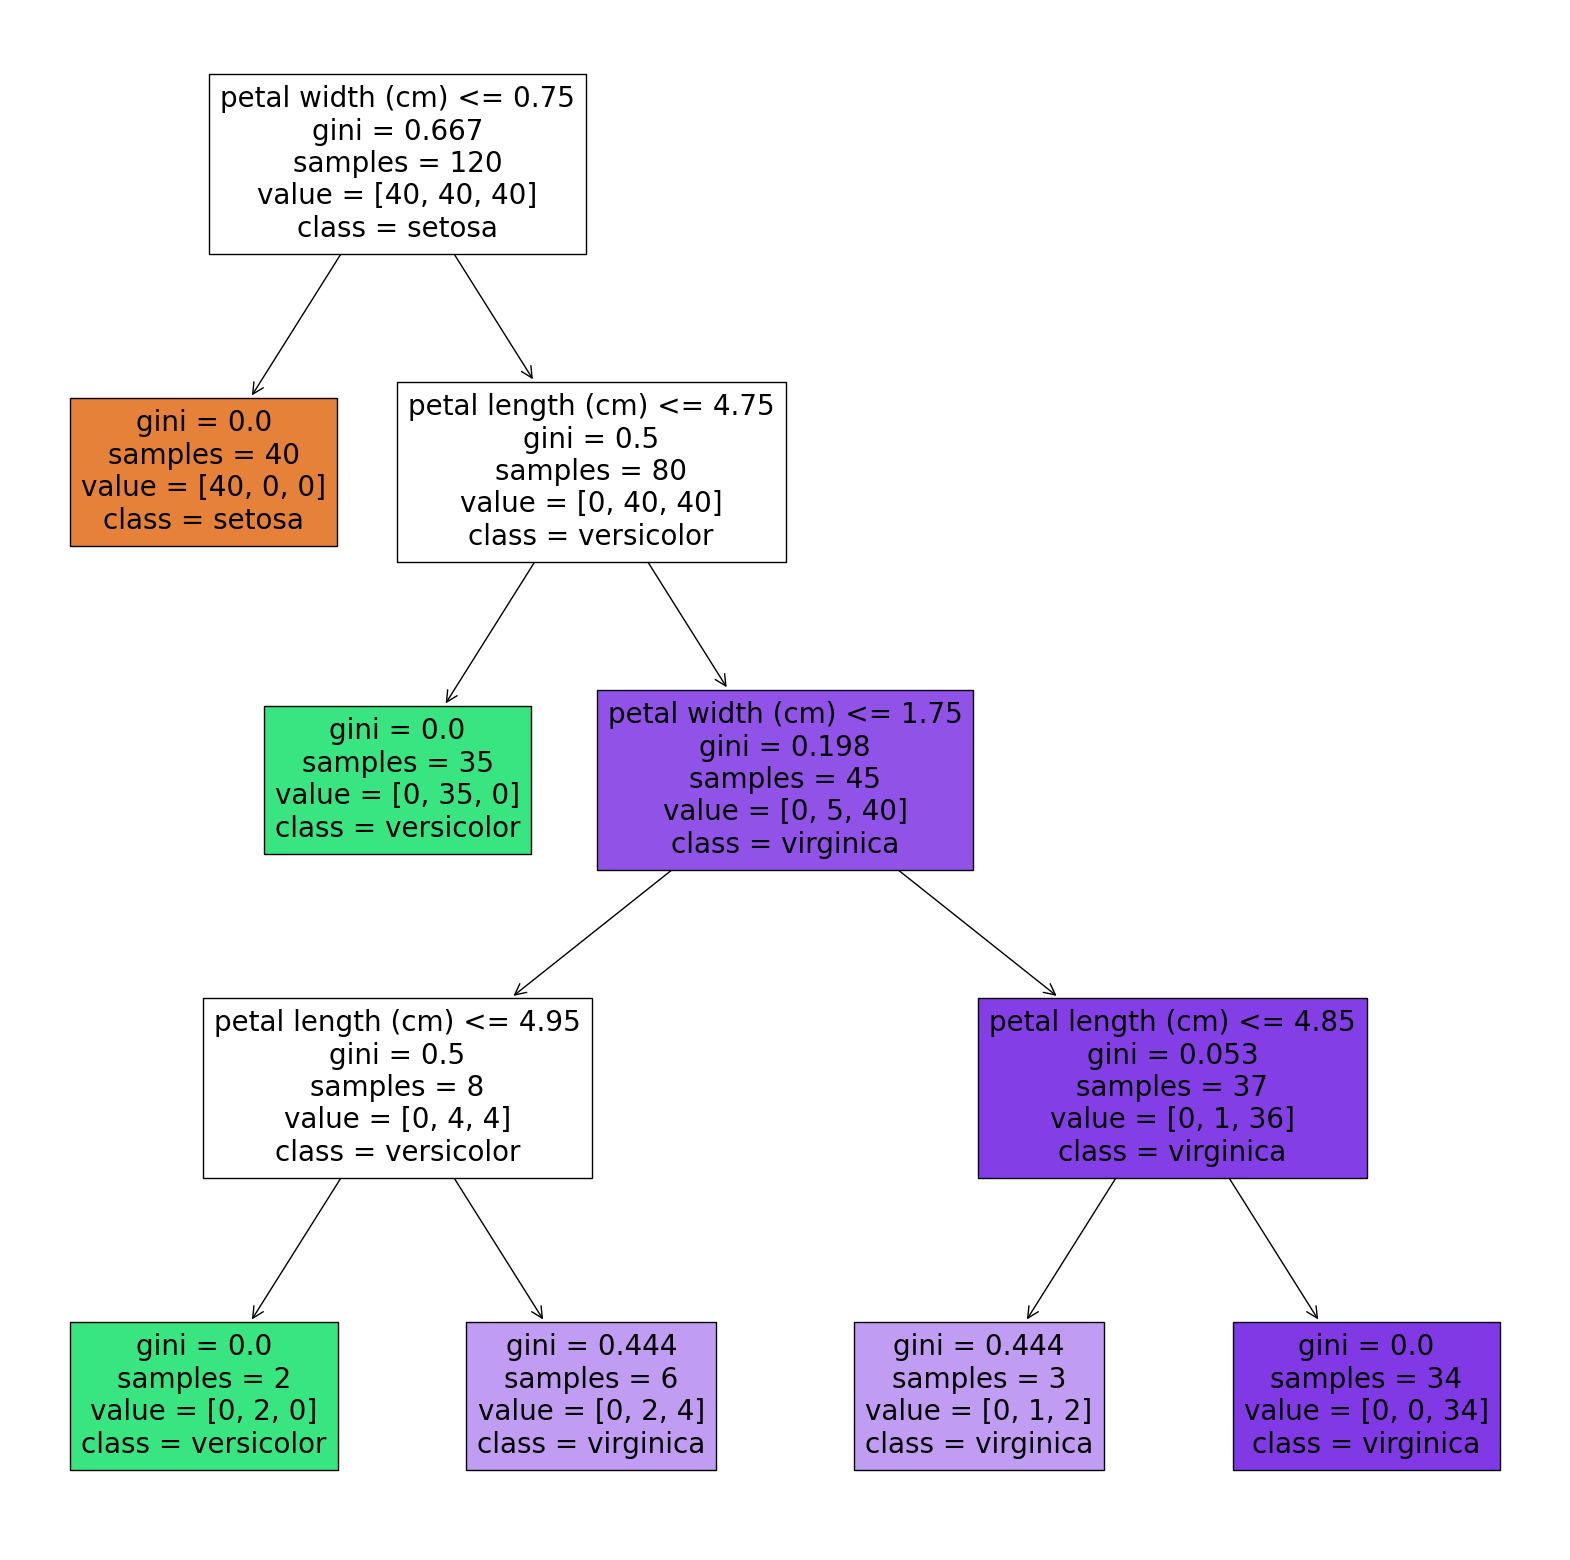

In [23]:
plt.figure(figsize=(20, 20))
plot_tree(
    dt_clf_pruned,
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names,
    filled=True,
)

In [24]:
train_preds_dt_clf_pruned = dt_clf_pruned.predict(X_train_iris)
test_preds_df_clf_pruned = dt_clf_pruned.predict(X_test_iris)

print("Accuracy at train: ", accuracy_score(y_train_iris, train_preds_dt_clf_pruned))
print("Accuracy at test: ", accuracy_score(y_test_iris, test_preds_df_clf_pruned))

Accuracy at train:  0.975
Accuracy at test:  0.9666666666666667


In [25]:
print("Depth: ", dt_clf_pruned.get_depth())
print("Number of leaves: ", dt_clf_pruned.get_n_leaves())

Depth:  4
Number of leaves:  6


In [26]:
dt_reg = DecisionTreeRegressor(random_state=1)
dt_reg.fit(X_train_ad, y_train_ad)

DecisionTreeRegressor(random_state=1)

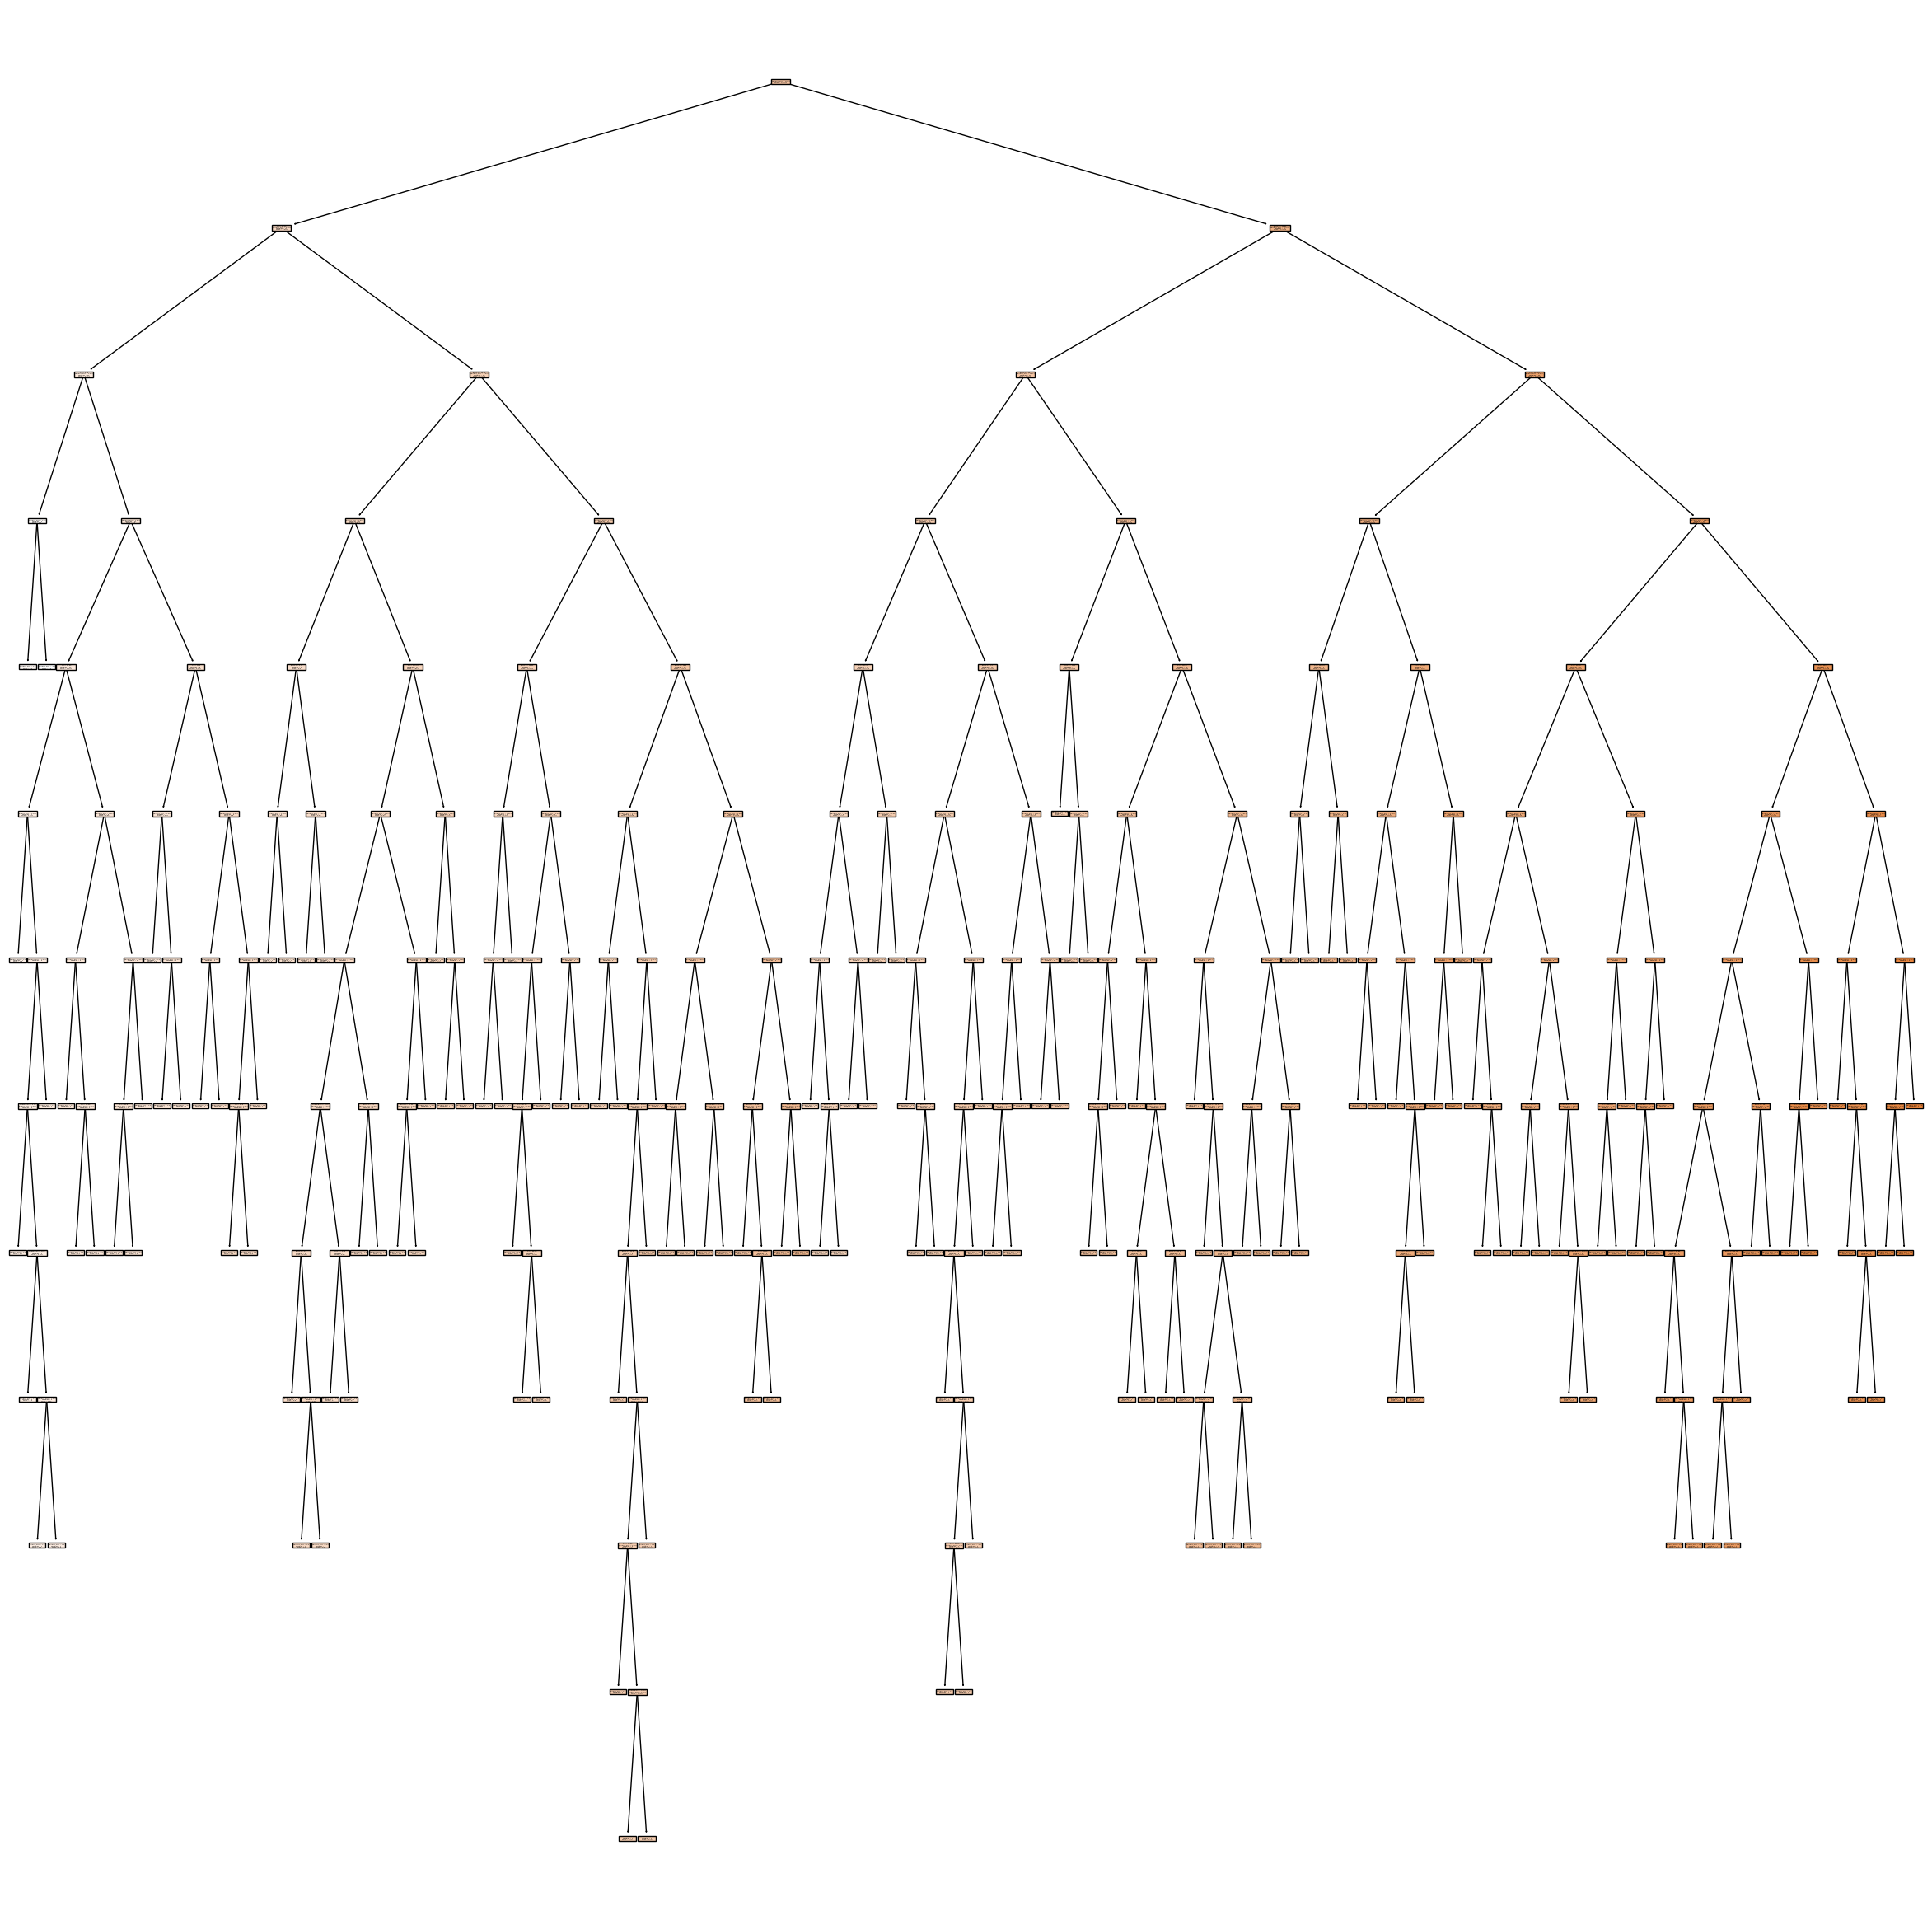

In [27]:
plt.figure(figsize=(30, 30))
plot_tree(
    dt_reg,
    feature_names=["TV", "Radio", "Newspaper"],
    filled=True,
)
plt.show()

In [28]:
print(dt_reg.feature_importances_)

[0.63023316 0.36713898 0.00262786]


In [32]:
train_preds_dt_reg = dt_reg.predict(X_train_ad)
test_preds_dt_reg = dt_reg.predict(X_test_ad)

print("Accuracy at train: ", mean_squared_error(y_train_ad, train_preds_dt_reg))
print("Accuracy at test: ", mean_squared_error(y_test_ad, test_preds_dt_reg))

Accuracy at train:  0.0
Accuracy at test:  0.5635000000000001


In [33]:
print("Depth: ", dt_reg.get_depth())
print("Leaves: ", dt_reg.get_n_leaves())

Depth:  12
Leaves:  153


In [34]:
dt_reg_pruned = DecisionTreeRegressor(random_state=1, max_depth=4)
dt_reg_pruned.fit(X_train_ad, y_train_ad)

DecisionTreeRegressor(max_depth=4, random_state=1)

[Text(0.5, 0.9, 'TV <= 122.05\nsquared_error = 28.99\nsamples = 160\nvalue = 13.811'),
 Text(0.25, 0.7, 'TV <= 30.05\nsquared_error = 8.263\nsamples = 71\nvalue = 9.593'),
 Text(0.125, 0.5, 'TV <= 4.75\nsquared_error = 3.205\nsamples = 23\nvalue = 6.509'),
 Text(0.0625, 0.3, 'Newspaper <= 7.2\nsquared_error = 0.64\nsamples = 2\nvalue = 2.4'),
 Text(0.03125, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 3.2'),
 Text(0.09375, 0.1, 'squared_error = -0.0\nsamples = 1\nvalue = 1.6'),
 Text(0.1875, 0.3, 'Radio <= 31.45\nsquared_error = 1.689\nsamples = 21\nvalue = 6.9'),
 Text(0.15625, 0.1, 'squared_error = 0.652\nsamples = 13\nvalue = 6.138'),
 Text(0.21875, 0.1, 'squared_error = 0.9\nsamples = 8\nvalue = 8.137'),
 Text(0.375, 0.5, 'Radio <= 13.45\nsquared_error = 3.945\nsamples = 48\nvalue = 11.071'),
 Text(0.3125, 0.3, 'TV <= 57.9\nsquared_error = 0.936\nsamples = 21\nvalue = 9.514'),
 Text(0.28125, 0.1, 'squared_error = 0.165\nsamples = 4\nvalue = 8.2'),
 Text(0.34375, 0.1, 'squared_er

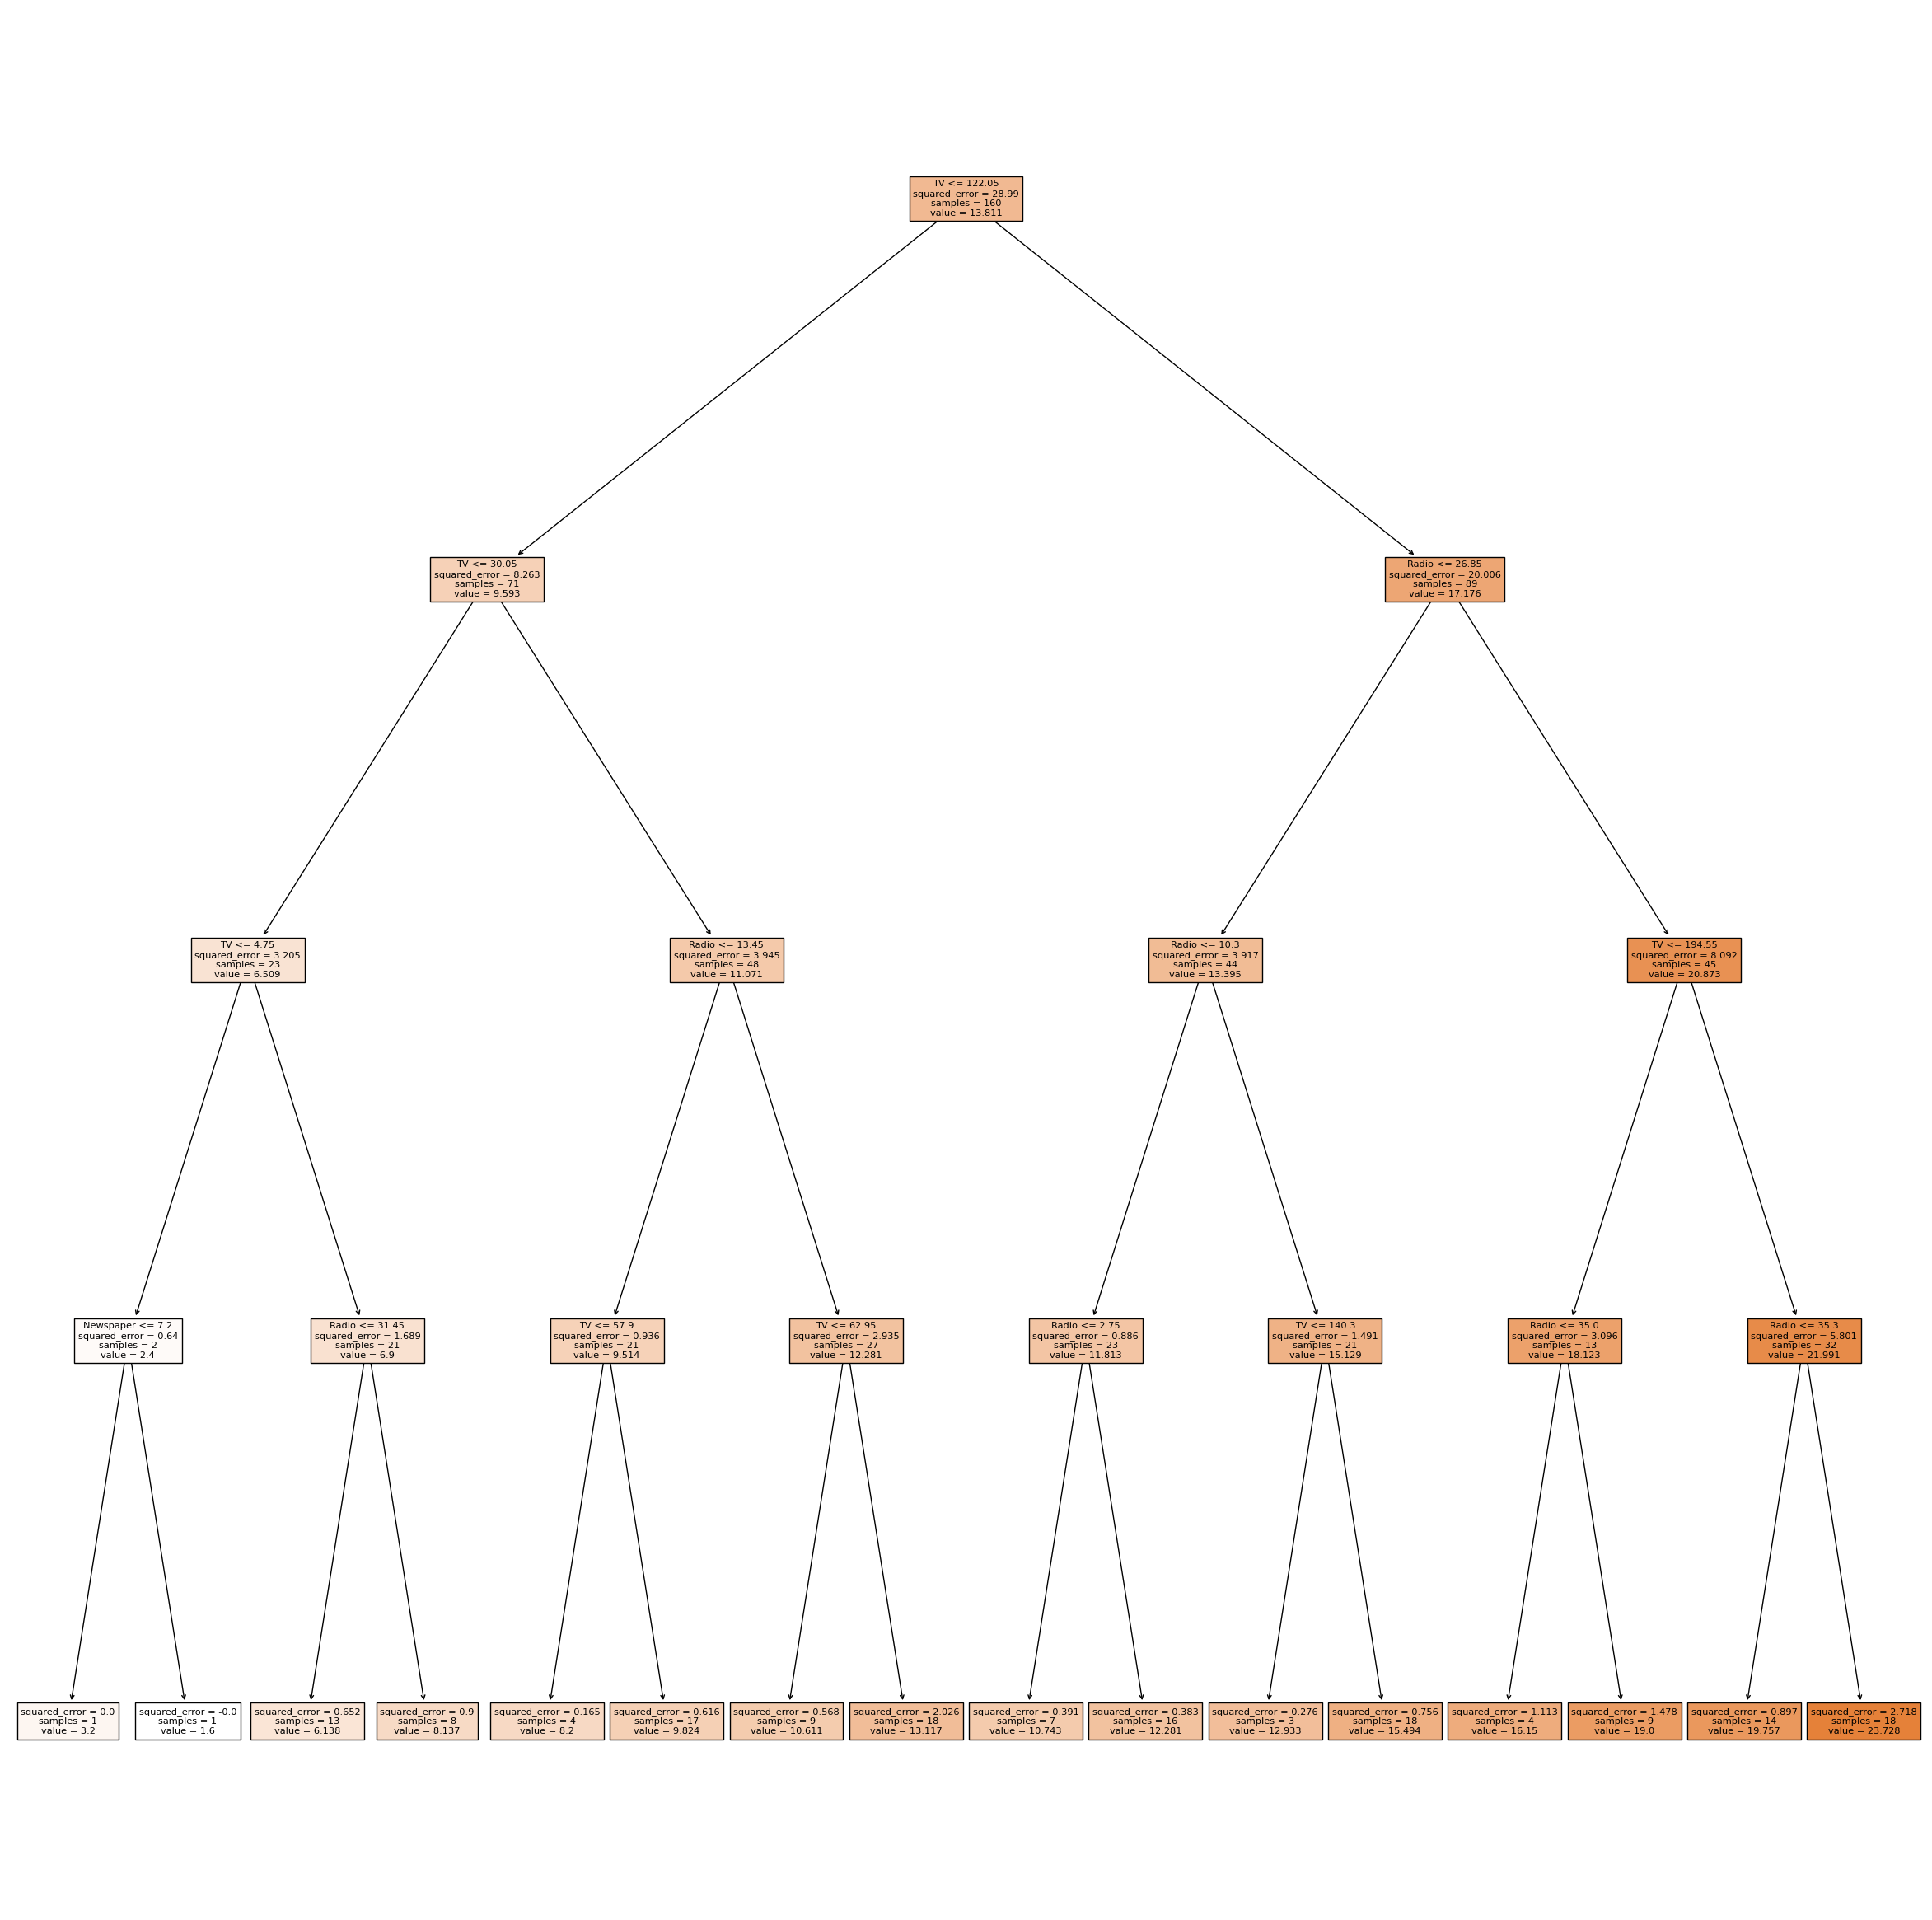

In [35]:
plt.figure(figsize=(30, 30))
plot_tree(
    dt_reg_pruned,
    feature_names=["TV", "Radio", "Newspaper"],
    filled=True,
)

In [36]:
train_preds_dt_reg_pruned = dt_reg_pruned.predict(X_train_ad)
test_preds_dt_reg_pruned = dt_reg_pruned.predict(X_test_ad)

print("MSE at train: ", mean_squared_error(y_train_ad, train_preds_dt_reg_pruned))
print("MSE at test: ", mean_squared_error(y_test_ad, test_preds_dt_reg_pruned))

MSE at train:  1.0680751384287688
MSE at test:  2.263173739158914


In [37]:
print("Depth: ", dt_reg_pruned.get_depth())
print("Leaves: ", dt_reg_pruned.get_n_leaves())

Depth:  4
Leaves:  16


In [40]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train_iris, y_train_iris)

RandomForestClassifier(random_state=1)

In [41]:
len(rf_clf.estimators_)

100

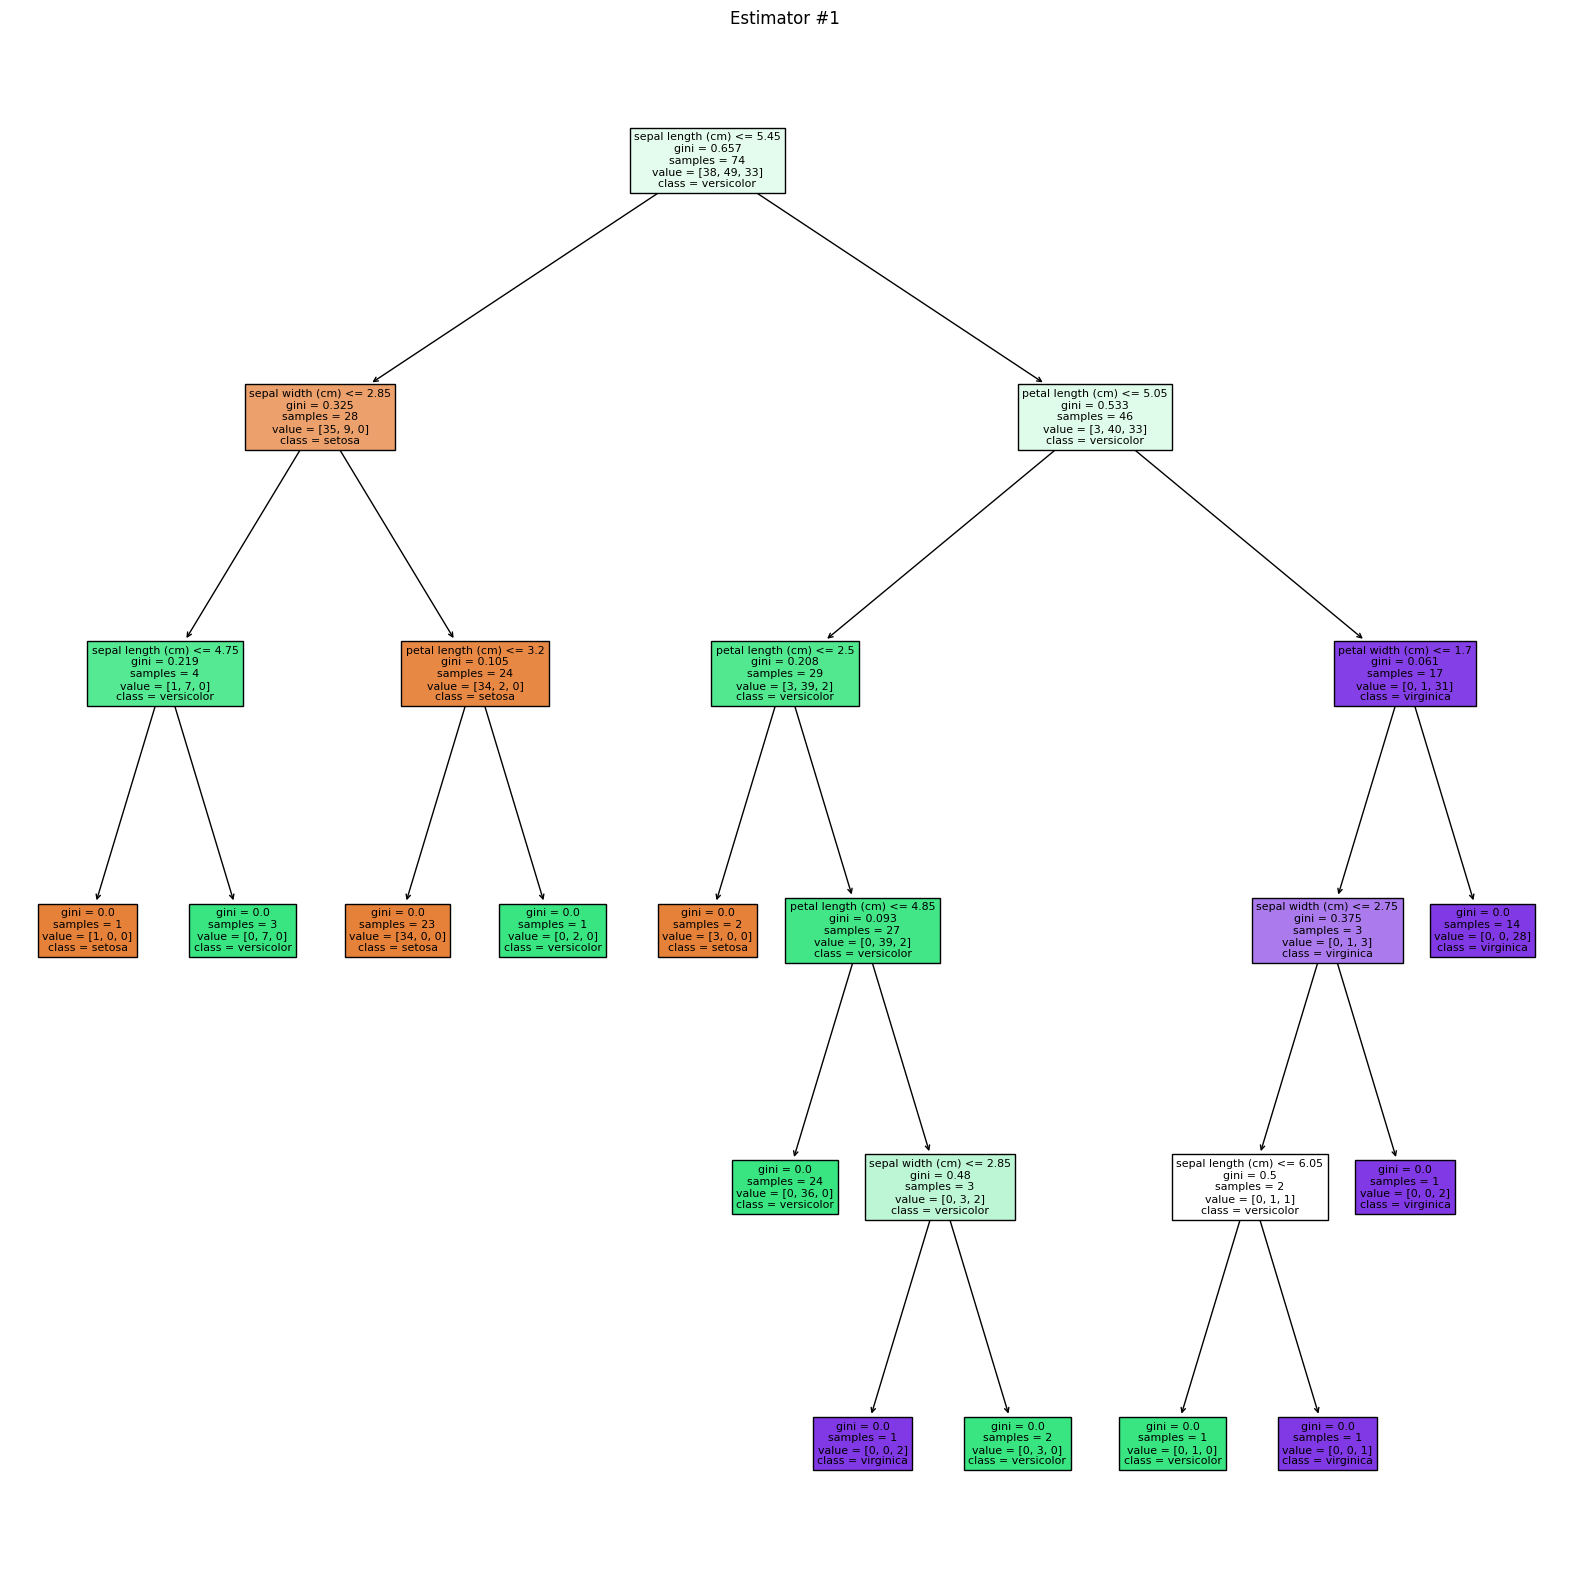

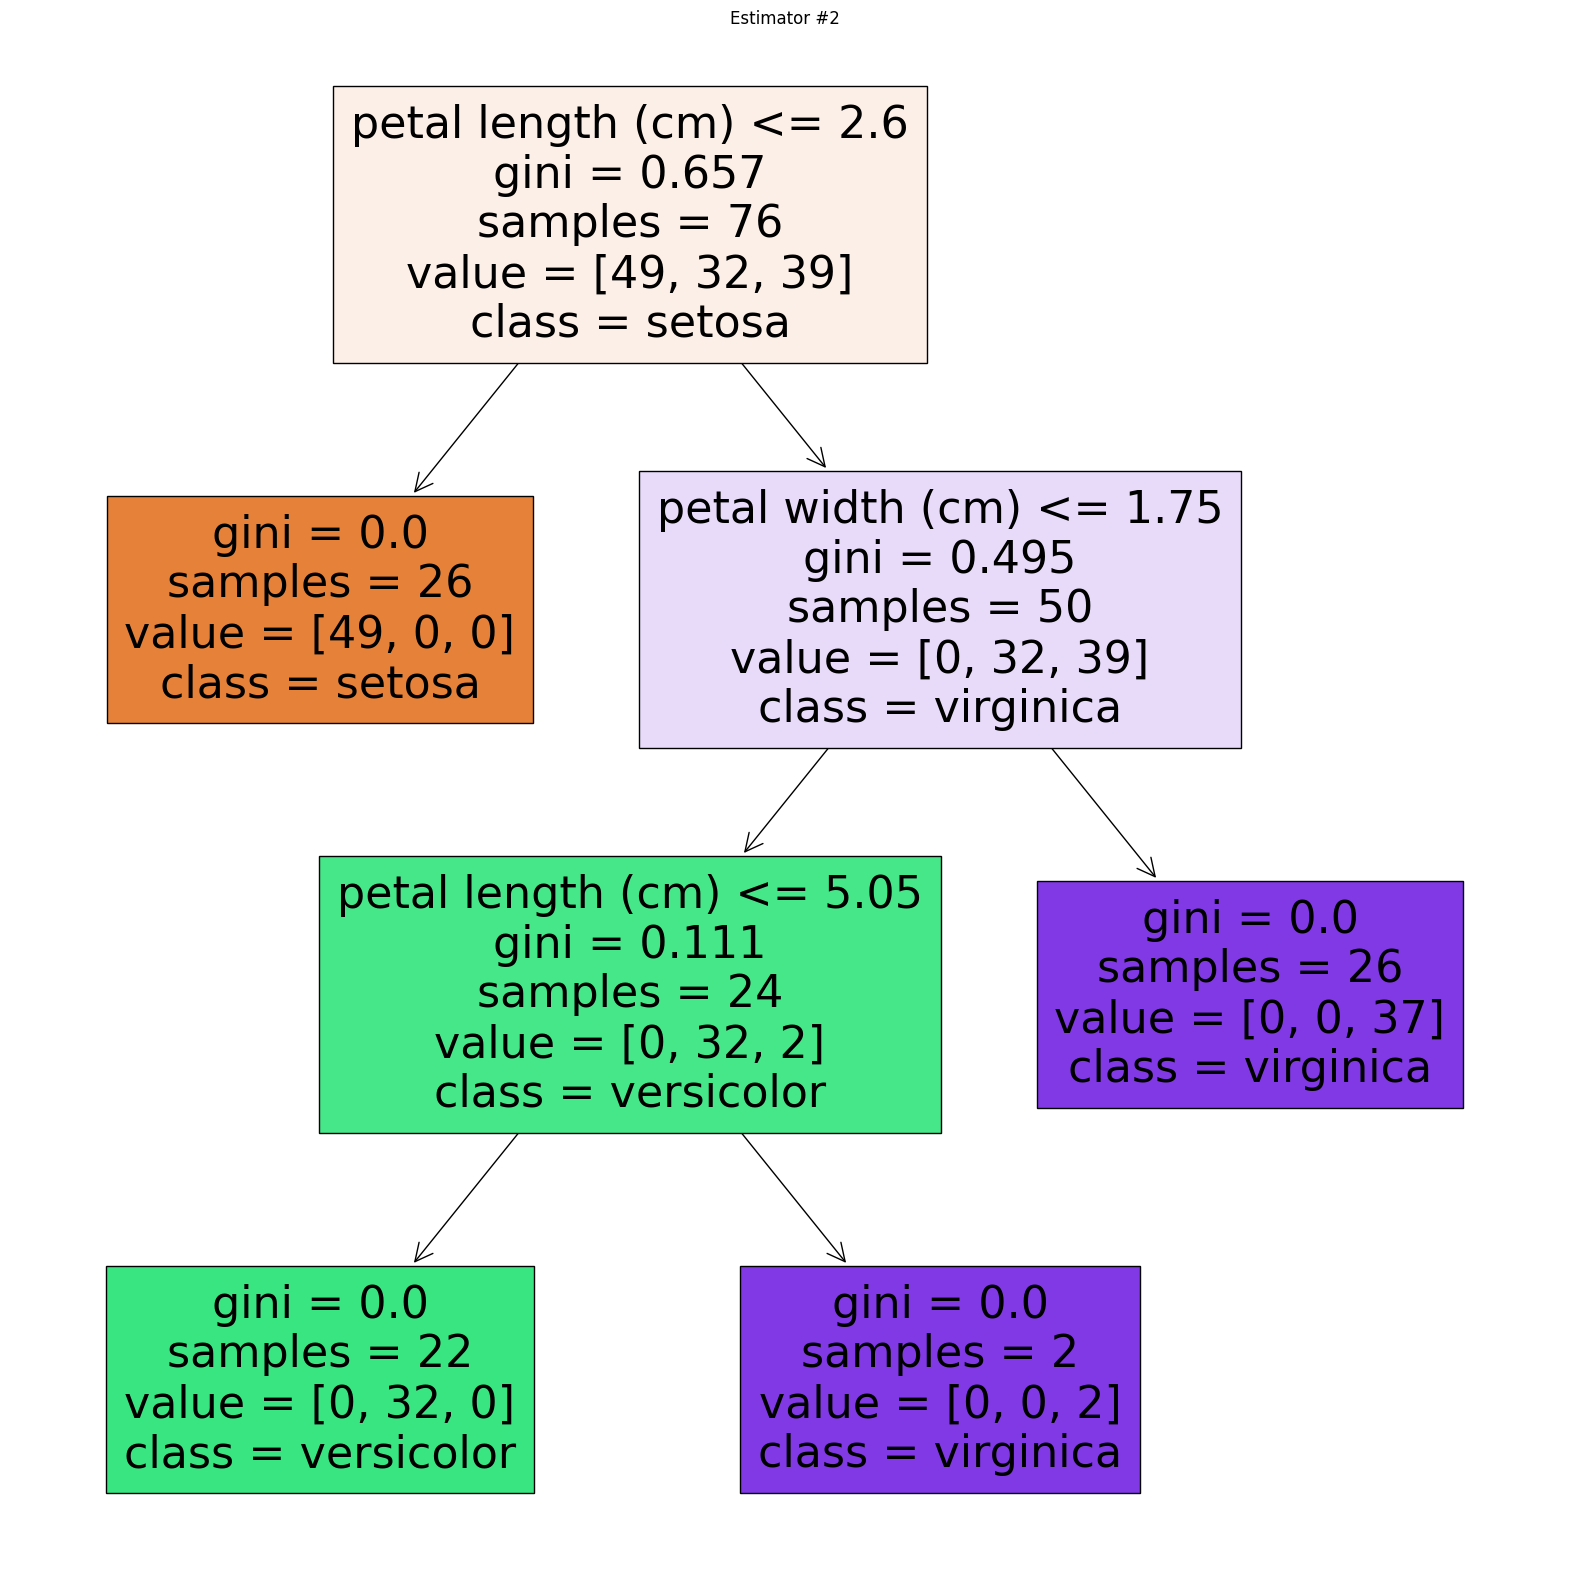

In [42]:
for index, estimator in enumerate(rf_clf.estimators_[:2], start=1):
    plt.figure(figsize=(20, 20))
    plot_tree(
        estimator,
        feature_names=iris_data.feature_names,
        class_names=iris_data.target_names,
        filled=True
    )
    plt.title(f"Estimator #{index}")
    plt.show()

In [43]:
train_preds_rf_clf = rf_clf.predict(X_train_iris)
test_preds_rf_clf = rf_clf.predict(X_test_iris)

print("Accuracy at train: ", accuracy_score(y_train_iris, train_preds_rf_clf))
print("Accuracy at test: ", accuracy_score(y_test_iris, test_preds_rf_clf))

Accuracy at train:  1.0
Accuracy at test:  0.9666666666666667


In [44]:
rf_clf_pruned = RandomForestClassifier(random_state=1, max_depth=4, n_estimators=10)
rf_clf_pruned.fit(X_train_iris, y_train_iris)

RandomForestClassifier(max_depth=4, n_estimators=10, random_state=1)

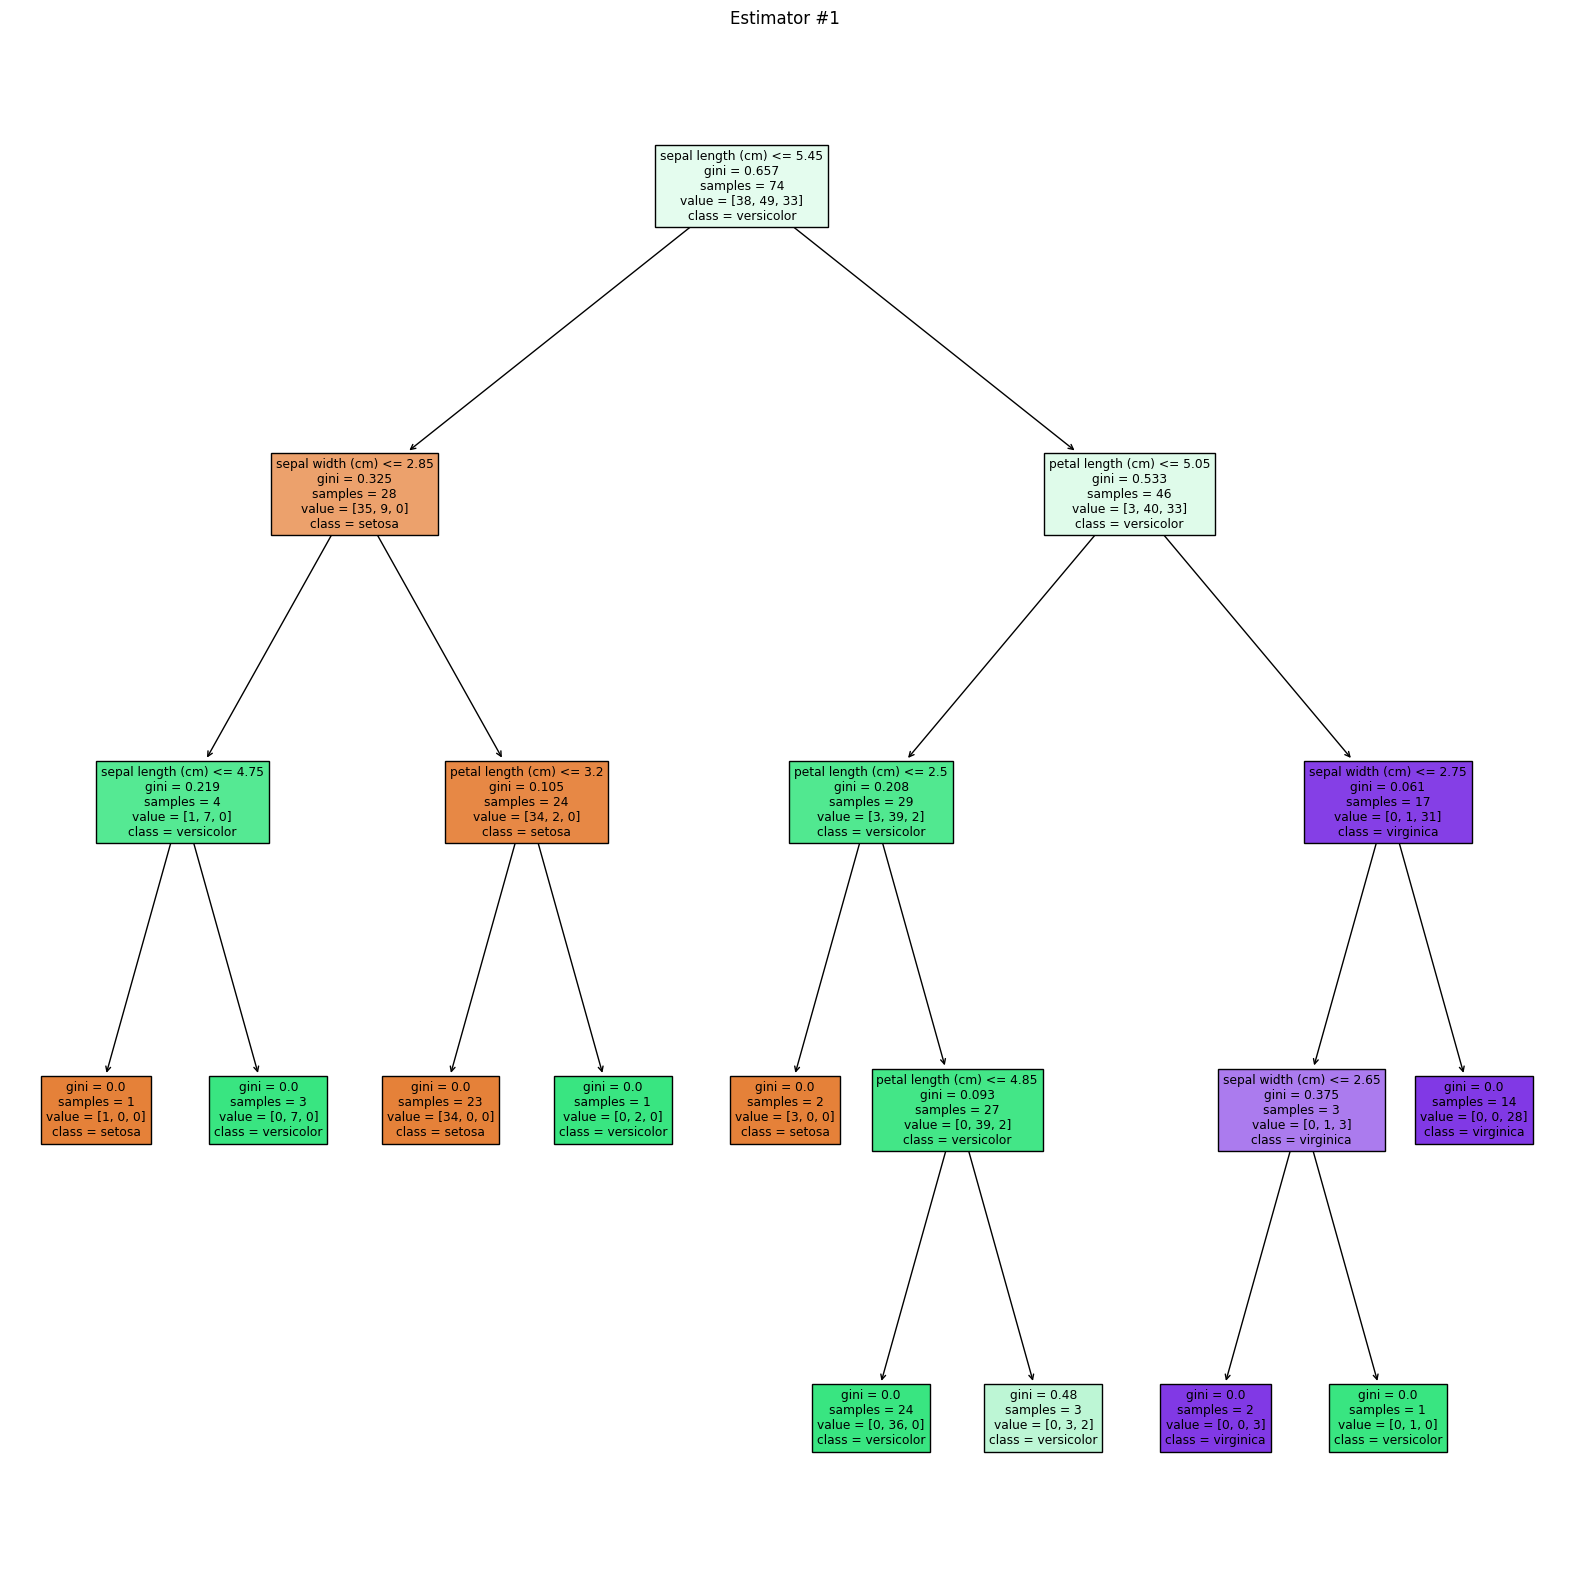

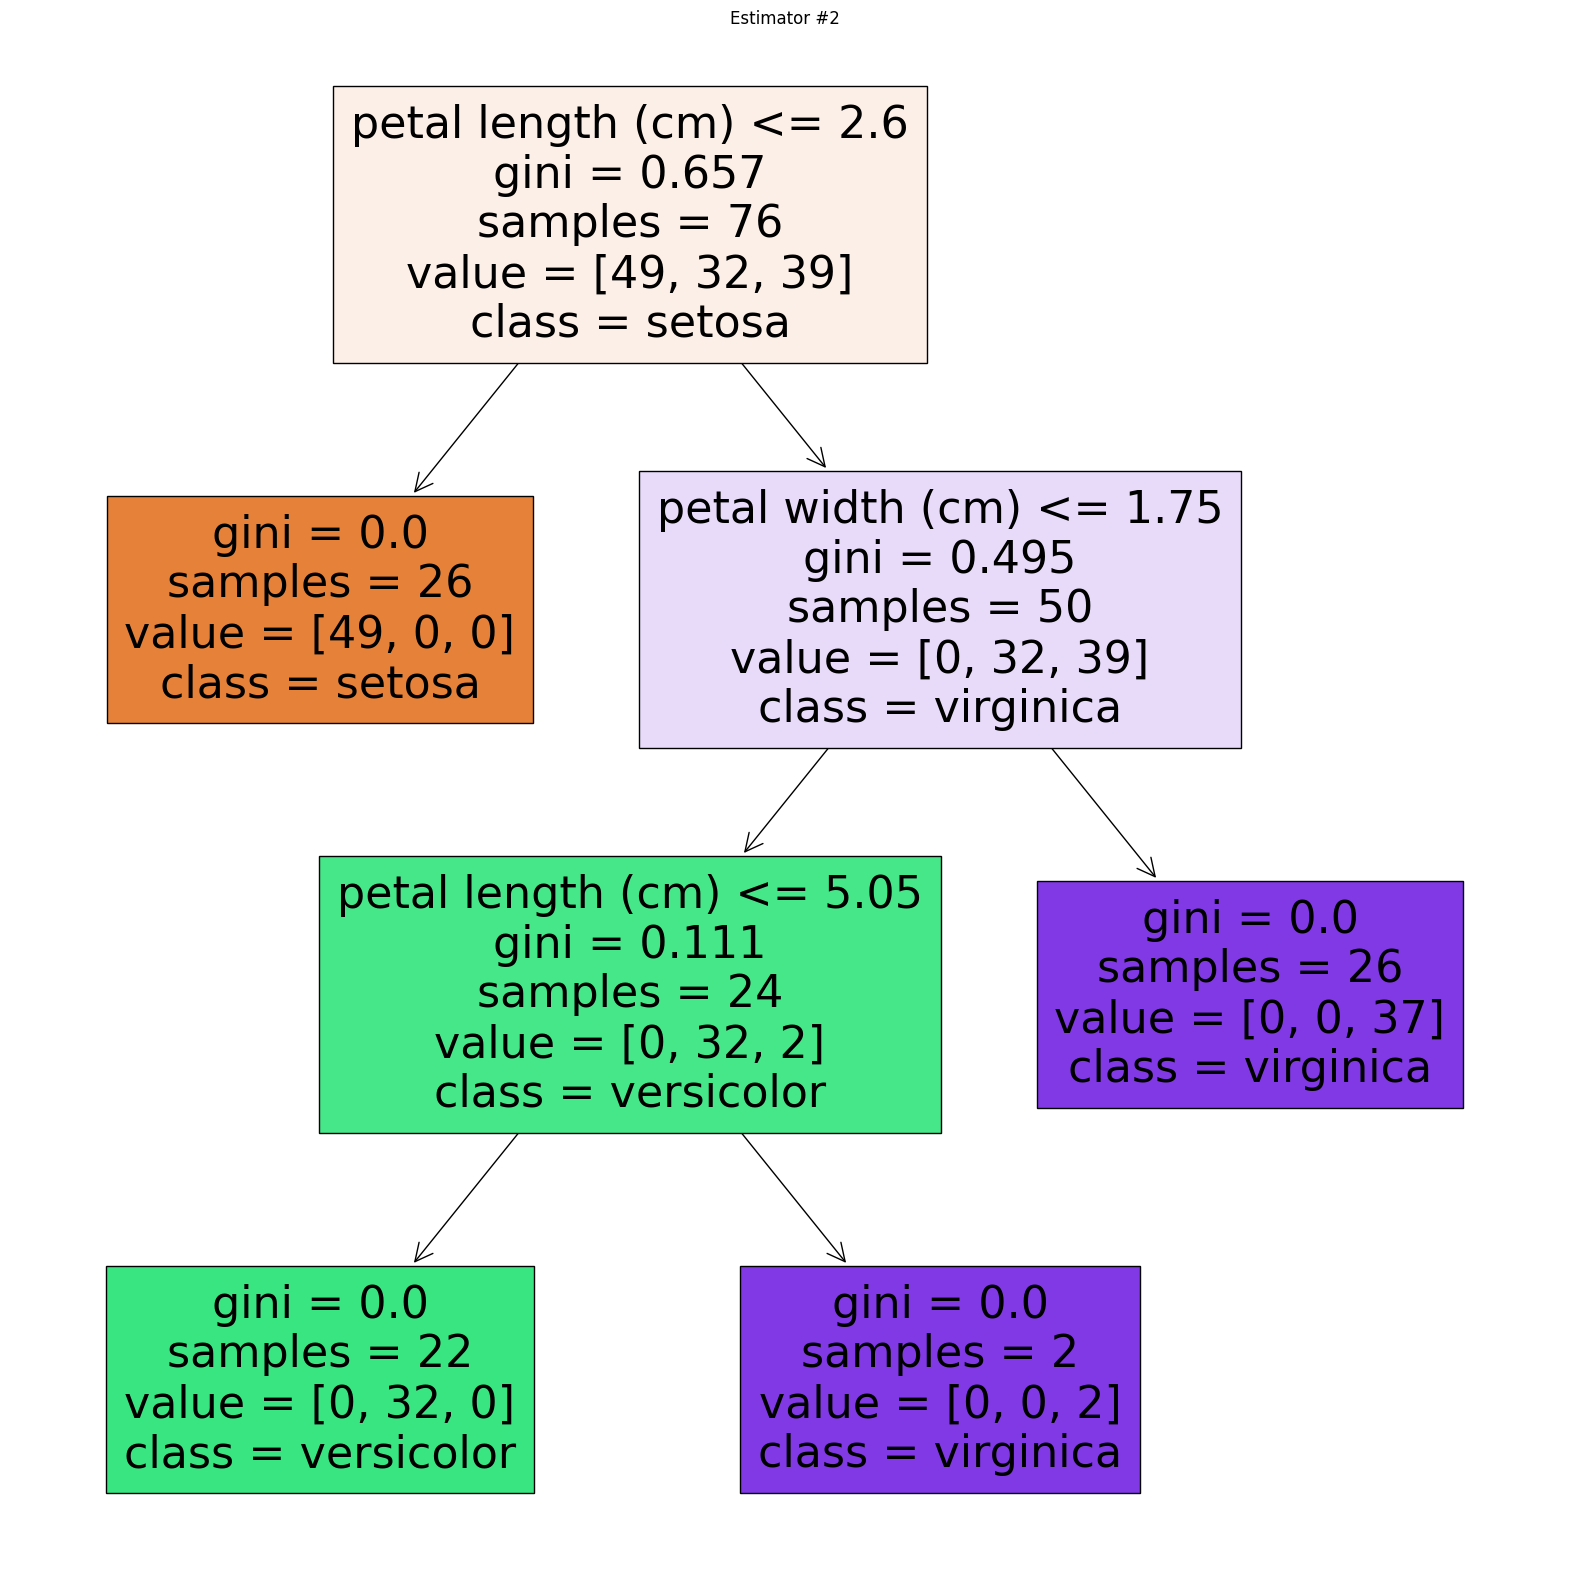

In [45]:
for index, estimator in enumerate(rf_clf_pruned[:2], start=1):
    plt.figure(figsize=(20, 20))
    plot_tree(
        estimator,
        feature_names=iris_data.feature_names,
        class_names=iris_data.target_names,
        filled=True
    )
    plt.title(f"Estimator #{index}")
    plt.show()

In [46]:
rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(X_train_ad, y_train_ad)

RandomForestRegressor(random_state=1)

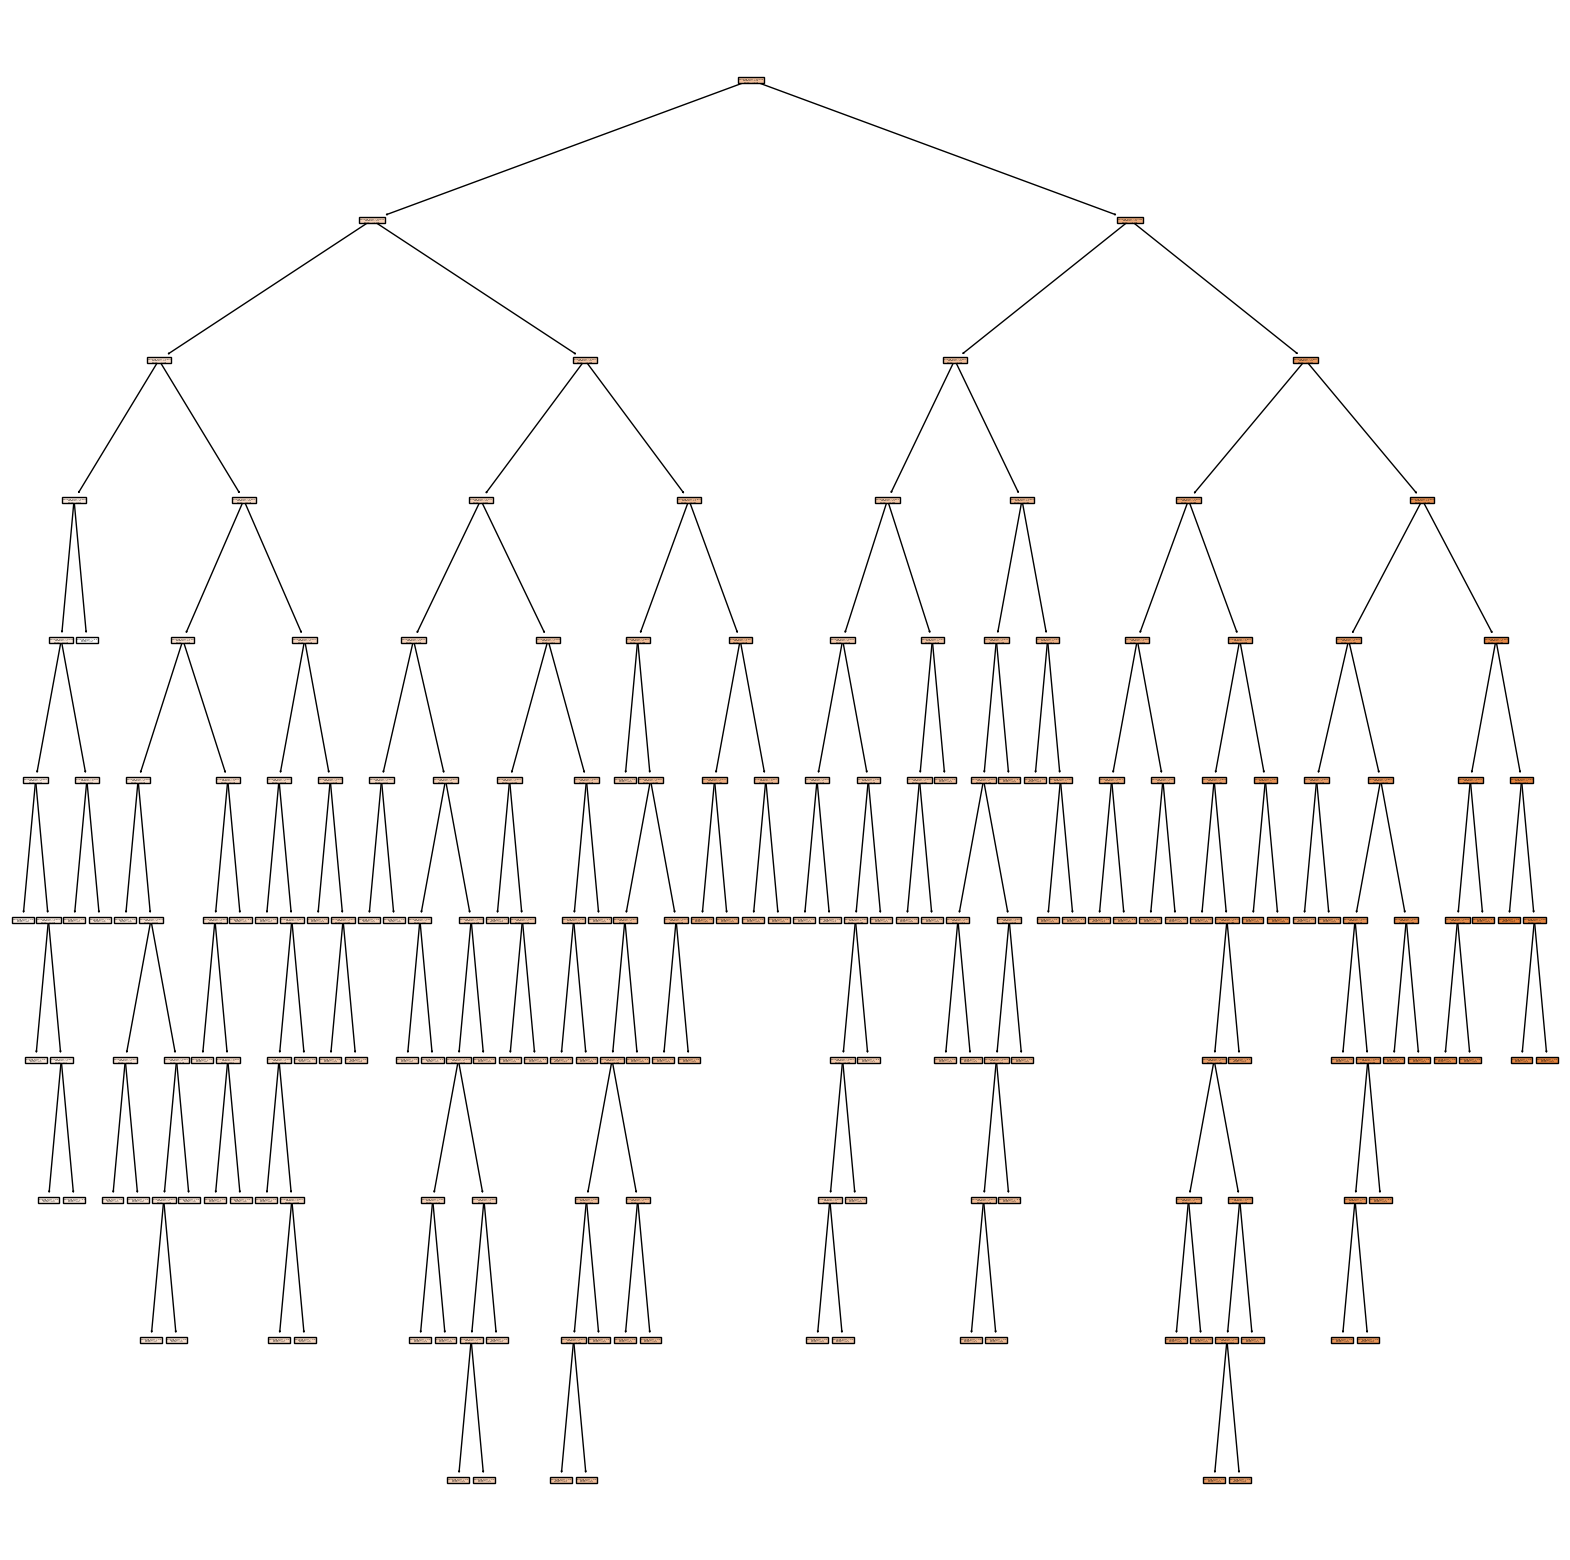

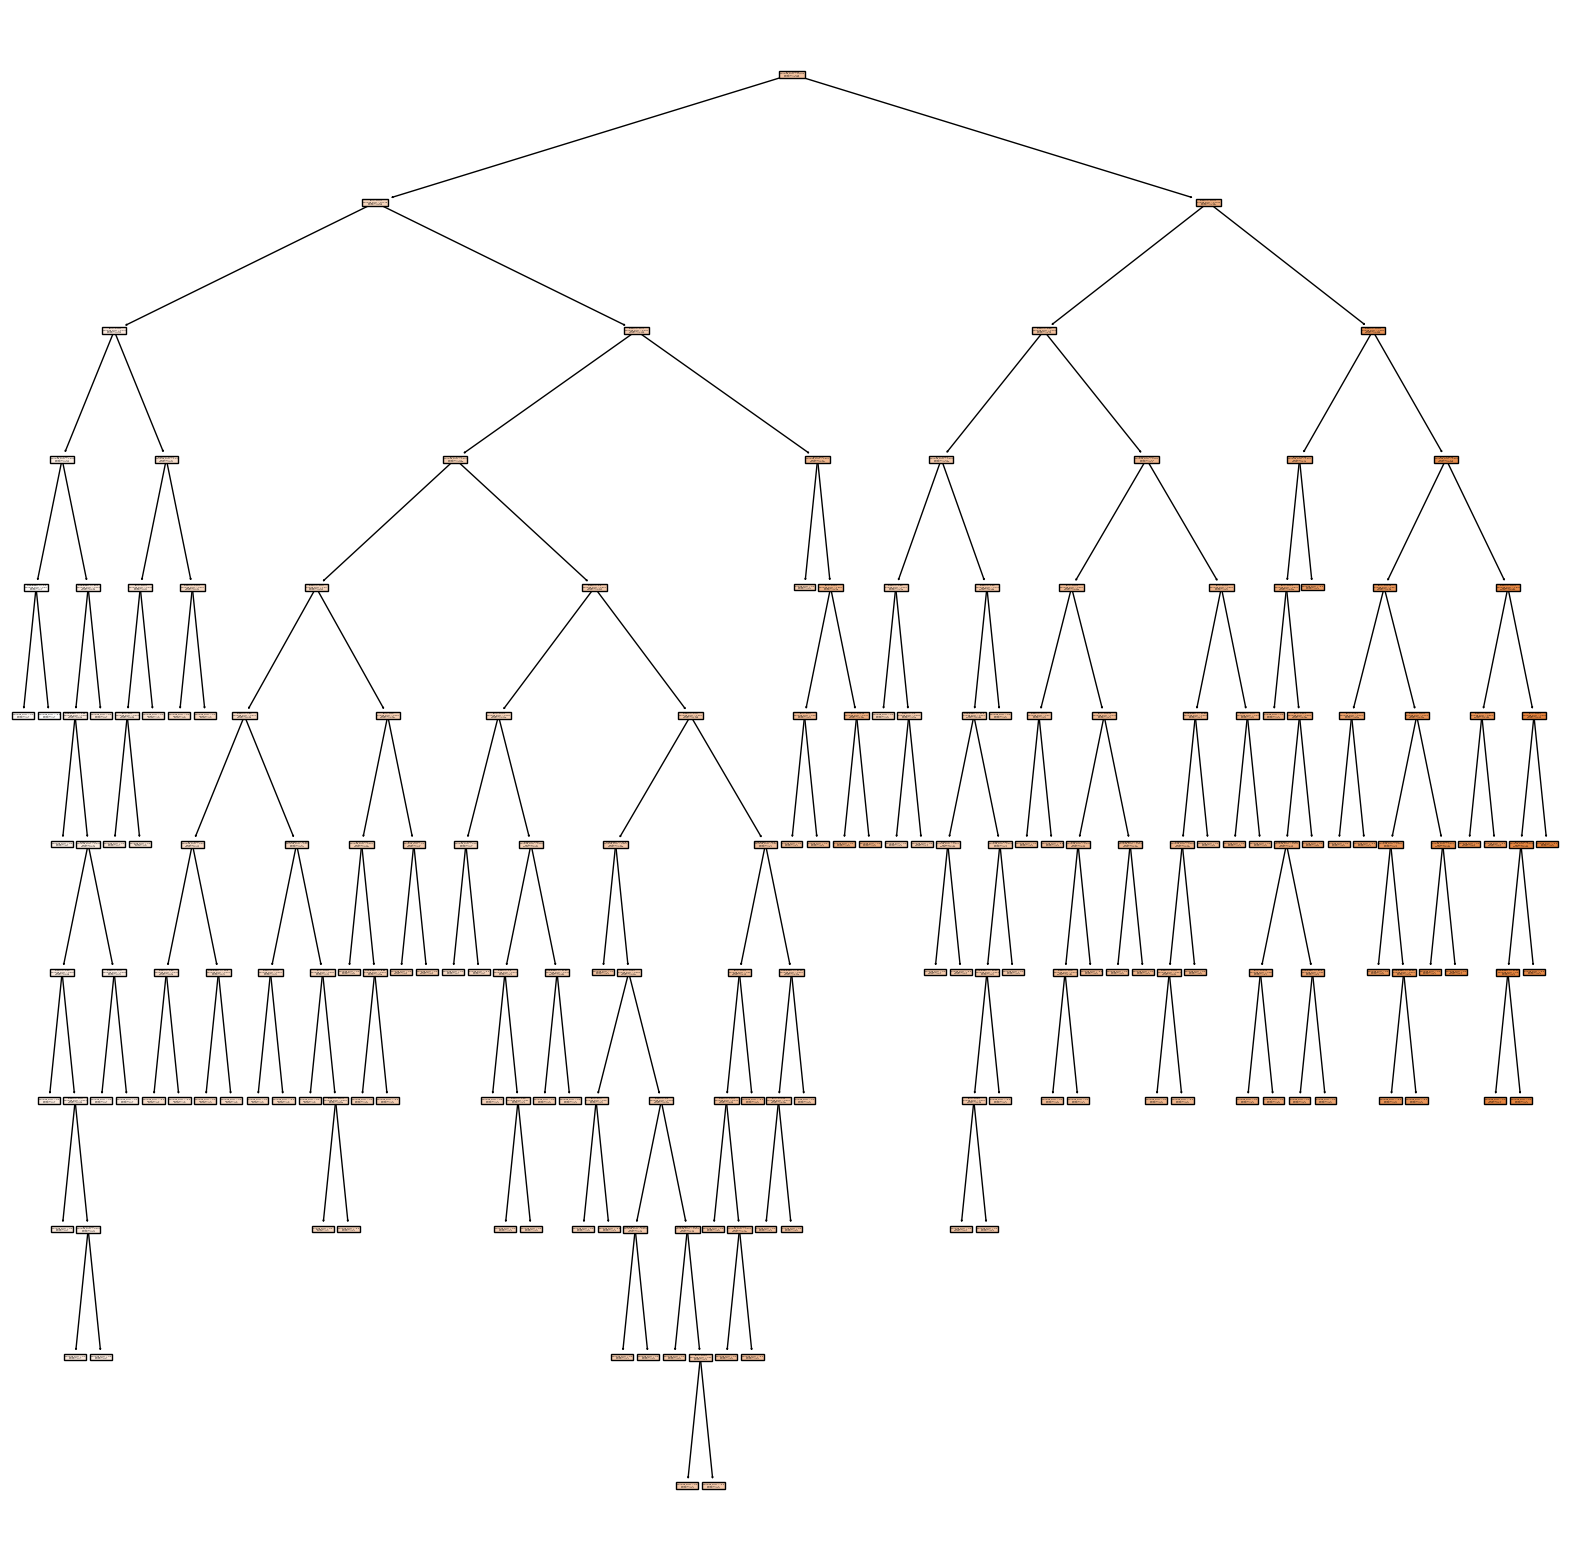

In [47]:
for index, estimator in enumerate(rf_reg.estimators_[:2], start=1):
    plt.figure(figsize=(20, 20))
    plot_tree(
        estimator,
        feature_names=["TV", "Radio", "Newspaper"],
        filled=True
    )
    plt.show()
    

In [48]:
train_preds_rf_reg = rf_reg.predict(X_train_ad)
test_preds_rf_reg = rf_reg.predict(X_test_ad)

print("MSE at train: ", mean_squared_error(y_train_ad, train_preds_rf_reg))
print("MSE at test: ", mean_squared_error(y_test_ad, test_preds_rf_reg))

MSE at train:  0.10042602499999928
MSE at test:  0.4657975999999987
